### 복습

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./data_in/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
print(train_data.head())
print(train_data.shape)

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
(25000, 3)


In [3]:
review = train_data['review']

## word
tokenized_review = [len(r.split()) for r in review]
# train_data[review].str.split().apply(len)
## alphabet
alphabet_review = [len(r.replace(' ', '')) for r in review]
# train_data[review].str.replace().apply(len)

print(tokenized_review)
print(alphabet_review)

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43, 48, 172, 382, 130, 112, 187, 395, 456, 241, 118, 231, 274, 254, 43, 38, 141, 225, 254, 670, 123, 54, 116, 120, 328, 373, 284, 135, 115, 169, 542, 250, 140, 121, 174, 164, 115, 80, 134, 252, 194, 161, 97, 212, 140, 57, 139, 148, 170, 72, 379, 515, 226, 132, 137, 122, 55, 968, 73, 194, 129, 128, 425, 184, 185, 130, 146, 263, 92, 192, 138, 133, 273, 420, 191, 428, 294, 346, 51, 124, 110, 107, 117, 124, 136, 136, 141, 165, 73, 197, 84, 215, 869, 94, 165, 48, 107, 125, 121, 361, 423, 183, 208, 321, 69, 117, 227, 124, 156, 106, 127, 187, 365, 136, 274, 337, 804, 463, 325, 111, 214, 133, 618, 166, 569, 425, 26, 328, 177, 168, 136, 166, 272, 165, 156, 255, 184, 169, 281, 334, 113, 83, 179, 161, 313, 288, 97, 225, 351, 453, 167, 344, 219, 104, 141, 243, 132, 933, 136, 112, 153, 171, 216, 282, 143, 440, 133, 349, 130, 152, 222, 445, 418, 789, 126, 221, 138, 85, 395, 119, 135, 771, 106, 67, 157, 74, 278, 74, 276, 224, 102, 110, 241, 121, 272, 874, 

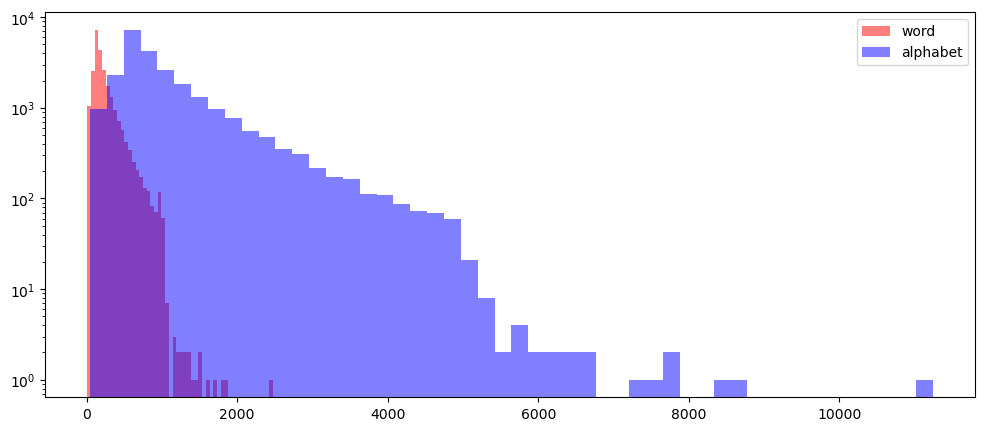

In [11]:
plt.figure(figsize=(12,5))
plt.hist(tokenized_review, bins=50, color='red', alpha = 0.5, label='word')
plt.hist(alphabet_review, bins=50, color='blue', alpha = 0.5, label='alphabet')
plt.yscale('log')
plt.legend()
plt.show()

In [14]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
print(qmarks)
print(capital_first)

0.29552
0.0


In [3]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

In [ ]:
## bs
review_bs = BeautifulSoup(review).get_text()

## re
review_bs_sub = re.sub('[^a-zA-Z]', ' ', review_bs)

## stopword
stop_word = stopwords.words('english')
review_bs_sub_lower = review_bs_sub.lower()
words = review_bs_sub_lower.split()
review_words = [w for w in words if not words in stop_word] 

##
clean_review = ' '.join(review_words)

In [4]:
def preprocessing(review, remove_stops = False):
    review_bs = BeautifulSoup(review).get_text()
    review_bs_sub = re.sub('[^a-zA-Z]', ' ', review_bs)

    if remove_stops:
        stop_word = stopwords.words('english')
        review_bs_sub_lower = review_bs_sub.lower()
        review_bs_sub_lower_split = review_bs_sub_lower.split()
        words = [w for w in review_bs_sub_lower_split if not w in stop_word]

        clean_review = ' '.join(words)
    else:
        clean_review = ' '.join(review_bs_sub)
        
    return clean_review

In [5]:
clean_train_review = []
for review in train_data['review']:
    clean_train_review.append(preprocessing(review, remove_stops=True))

clean_train_review[0]

/home/jasper/anaconda3/envs/nlp/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
train_data = pd.read_csv('./data_in/clean_train_df.csv')
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [11]:
reviews = train_data['review'] # input
sentiments = train_data['sentiment'] # target

In [12]:
tfidf_vec = TfidfVectorizer(analyzer='char', ngram_range=(1,3), max_features=5000)

In [13]:
tfidf_vec.fit(reviews)
X = tfidf_vec.transform(reviews)
y = np.array(sentiments)

In [14]:
tfidf_vec.vocabulary_

{'s': 3881,
 't': 4129,
 'u': 4337,
 'f': 1493,
 ' ': 0,
 'g': 1619,
 'o': 3083,
 'i': 1951,
 'n': 2804,
 'm': 2627,
 'e': 1153,
 'j': 2225,
 'a': 294,
 'r': 3572,
 'd': 958,
 'l': 2396,
 'c': 772,
 'w': 4640,
 'h': 1776,
 'y': 4834,
 'z': 4949,
 'k': 2277,
 'b': 614,
 'p': 3402,
 'v': 4562,
 'x': 4766,
 'q': 3565,
 'st': 4087,
 'tu': 4306,
 'uf': 4406,
 'ff': 1545,
 'f ': 1494,
 ' g': 90,
 'go': 1734,
 'oi': 3196,
 'in': 2099,
 'ng': 2915,
 'g ': 1620,
 ' m': 154,
 'mo': 2749,
 'om': 3235,
 'me': 2690,
 'en': 1337,
 'nt': 3032,
 't ': 4130,
 'j ': 2226,
 ' s': 221,
 'ta': 4156,
 'ar': 506,
 'rt': 3823,
 'te': 4185,
 'ed': 1222,
 'd ': 959,
 ' l': 145,
 'li': 2498,
 'is': 2163,
 'ni': 2934,
 'mu': 2787,
 'us': 4521,
 'si': 3994,
 'ic': 1993,
 'c ': 773,
 ' w': 271,
 'wa': 4666,
 'at': 545,
 'tc': 4178,
 'ch': 841,
 'hi': 1854,
 ' o': 175,
 'od': 3146,
 'dd': 1013,
 ' d': 47,
 'do': 1087,
 'oc': 3134,
 'cu': 942,
 'um': 4452,
 'ry': 3866,
 'y ': 4835,
 'he': 1832,
 'wi': 4707,
 'iz': 22

In [18]:
print(X[0].toarray())
print(np.shape(X))
print(type(X))

[[0.52387043 0.01984267 0.         ... 0.         0.         0.        ]]
(25000, 5000)
<class 'scipy.sparse._csr.csr_matrix'>


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lgs = LogisticRegression(max_iter=1000) # 경사 하강법 1000번까지 하겠다
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
predicted = lgs.predict(X_test)
predicted

array([0, 1, 0, ..., 0, 0, 0])

In [26]:
predicted_proba = lgs.predict_proba(X_test)
predicted_proba

array([[0.8660597 , 0.1339403 ],
       [0.31870449, 0.68129551],
       [0.82165083, 0.17834917],
       ...,
       [0.85341612, 0.14658388],
       [0.71775667, 0.28224333],
       [0.83610683, 0.16389317]])

In [27]:
lgs.score(X_test, y_test)

0.833

In [28]:
test_data = pd.read_csv('./data_in/clean_test_df.csv')
test_data.head()

,review,id
0,naturally film main themes mortality nostalgia...,"""12311_10"""
1,movie disaster within disaster film full great...,"""8348_2"""
2,movie kids saw tonight child loved one point k...,"""5828_4"""
3,afraid dark left impression several different ...,"""7186_2"""
4,accurate depiction small time mob life filmed ...,"""12128_7"""


In [30]:
test_data['id'] = test_data['id'].str.replace('"', '')
test_data.head()

,review,id
0,naturally film main themes mortality nostalgia...,12311_10
1,movie disaster within disaster film full great...,8348_2
2,movie kids saw tonight child loved one point k...,5828_4
3,afraid dark left impression several different ...,7186_2
4,accurate depiction small time mob life filmed ...,12128_7


In [31]:
test_vec = tfidf_vec.transform(test_data['review'])

In [33]:
test_predicted = lgs.predict(test_vec)
print(test_predicted)

[1 0 1 ... 1 1 0]


In [35]:
result_test = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
result_test.to_csv('./data_out/lgs_tfidf_result.csv', index = False)

### word2vec

In [36]:
train_data = pd.read_csv('./data_in/clean_train_df.csv')
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [39]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [40]:
sentences = []
for review in reviews:
    sentences.append(review.split())

In [46]:
from gensim.models import word2vec

In [48]:
w2v_model = word2vec.Word2Vec(sentences, vector_size = 300, min_count = 40, window = 10, sample = 0.001)

In [49]:
model_name = '300feat_40minword_10context'
w2v_model.save(model_name)

In [55]:
print(len(w2v_model.wv.index_to_key))
print(w2v_model.wv.index_to_key)
print(w2v_model.wv['movie'])
print(len(w2v_model.wv['movie']))

8160
['movie', 'film', 'one', 'like', 'good', 'time', 'even', 'would', 'story', 'really', 'see', 'well', 'much', 'get', 'bad', 'people', 'also', 'first', 'great', 'made', 'way', 'make', 'could', 'movies', 'think', 'characters', 'character', 'watch', 'two', 'films', 'seen', 'many', 'life', 'plot', 'acting', 'never', 'love', 'little', 'best', 'show', 'know', 'ever', 'man', 'better', 'end', 'still', 'say', 'scene', 'scenes', 'go', 'something', 'back', 'real', 'watching', 'though', 'thing', 'old', 'years', 'actors', 'director', 'work', 'another', 'new', 'nothing', 'funny', 'actually', 'makes', 'look', 'find', 'going', 'part', 'lot', 'every', 'world', 'cast', 'us', 'quite', 'want', 'things', 'pretty', 'young', 'seems', 'around', 'horror', 'got', 'however', 'fact', 'take', 'big', 'enough', 'long', 'thought', 'series', 'may', 'original', 'give', 'action', 'right', 'without', 'must', 'comedy', 'always', 'times', 'point', 'gets', 'family', 'come', 'role', 'saw', 'almost', 'interesting', 'least'

In [56]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index_to_key)

    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [57]:
def get_dataset(reviews, model, num_features):
    dataset = []

    for s in reviews:
        dataset.append(get_features(s, model, num_features))
    
    reviewFeatureVecs = np.array(dataset)
    return reviewFeatureVecs

In [61]:
train_data_vecs = get_dataset(sentences, w2v_model, 300)

In [63]:
print(train_data_vecs.shape)
train_data_vecs[0]

(25000, 300)


array([ 1.47404954e-01,  8.01557526e-02, -1.51592016e-01, -1.70410261e-01,
       -6.79783225e-02, -8.93967506e-03,  1.06182061e-01,  3.07252437e-01,
        3.00311707e-02,  8.97331014e-02,  2.69937962e-01,  7.40871206e-02,
       -1.64708823e-01, -2.78095633e-01,  1.17575355e-01, -2.87137032e-01,
        3.35446060e-01, -1.11281544e-01,  1.01537175e-01,  2.01006740e-01,
        1.58731565e-01,  3.80421057e-02,  2.76314914e-01, -7.00791366e-03,
        4.05271202e-02, -2.71433473e-01, -2.05964163e-01, -2.49955028e-01,
       -6.19553924e-02, -1.17678709e-01, -1.28827924e-02, -6.47759438e-03,
       -4.33419161e-02, -8.57323781e-02,  2.13159278e-01,  2.59545911e-03,
       -6.11856058e-02, -2.34196812e-01, -1.09111182e-01, -6.74761757e-02,
        6.49795160e-02,  5.06628752e-02,  7.08188489e-03,  1.25413403e-01,
       -1.97857201e-01, -4.77782004e-02,  3.86434421e-02, -1.44691974e-01,
       -2.05564111e-01, -1.37500027e-02,  2.13206559e-01, -2.58390699e-02,
        2.16229916e-01,  

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_data_vecs, y, test_size=0.2, random_state=42)

In [67]:
lgs_w2v = LogisticRegression(max_iter=1000)
lgs_w2v.fit(X_train, y_train)
lgs_w2v.score(X_test, y_test)

0.8672

In [68]:
test_review = list(test_data['review'])

In [69]:
test_sentences = []
for review in test_review:
    test_sentences.append(review.split())

In [70]:
test_data_vecs = get_dataset(test_sentences, w2v_model, 300)

In [76]:
test_predicted = lgs_w2v.predict(test_data_vecs)
print(test_predicted)

[1 0 1 ... 0 1 1]


In [77]:
result_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})

result_dataset.to_csv('./data_out/lgs_w2v_result.csv',index=False)

### 랜덤 포레스트 모델

In [78]:
train_data = pd.read_csv('./data_in/clean_train_df.csv')
reviews = list(train_data['review'])
y = np.array(train_data['sentiment'])

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', max_features=5000)
train_data_features = vectorizer.fit_transform(reviews)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y, test_size = 0.2, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
forest.score(X_test, y_test)

0.847

In [85]:
test_data_features = vectorizer.transform(list(test_data['review']))

In [86]:
forest_predicted = forest.predict(test_data_features)

In [87]:
result_dataset_forest = pd.DataFrame({'id': test_data['id'], 'sentiment': forest_predicted})

result_dataset.to_csv('./data_out/lgs_forest_result.csv',index=False)